# LAB3

In this lab we are tasked with exploring various local-search algorithm to solve a black-box problem in the minimum number of fitness calls.

In [46]:
from random import choices, sample, random, randint, choice

import lab9_lib

### Evolutionary Algorithm
Let's start with an Evolutionary Algorithm, to avoid wasting calls we use an implementation of the $\mu + \lambda$ selection method, we also impose the coexistence of crossover and mutation (we defined them as mutually exclusive in the previous lab).
We expect poor results overall given the randomic nature of the algorithm. 

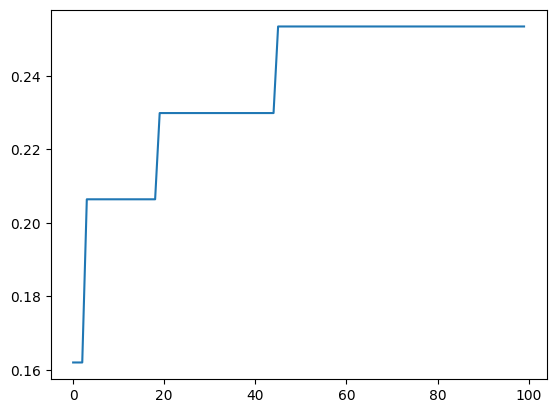

15000


In [45]:
import matplotlib.pyplot as plt

fitness = lab9_lib.make_problem(10)
NUM_LOCI = 1000

def crossover(p1, p2):
    o = []
    for i in range(NUM_LOCI):
        o.append(choice([p1[i], p2[i]]))
    return o

def mutate(m, min_mutation=0.01, max_mutation=0.02):  #randomly mutates between 1% and 2% of the genome
    o=m.copy()
    n_mutants = randint(int(NUM_LOCI*min_mutation), int(NUM_LOCI*max_mutation))
    mutants = sample(range(NUM_LOCI), n_mutants)
    for i in mutants:
        o[i] = 1 - o[i]
    return o

def sortKey(arg, holder):  #stores the maximum inside the holder while evaluating fitness
    f = fitness(arg)
    if f > holder[0]:
        holder[0]=f
    return f

def ea(pop_size, num_offsprings, mutation_rate=0.15, max_iter=100):
    population = []
    fitness_plot = []
    for _ in range(pop_size):
        c = choices([0, 1], k=1000)
        population.append(c)
    fitness_holder = [0] #use list as a mutable variable
    i = 0
    while fitness_holder[0]!=1 and i < max_iter:
        i += 1
        offsprings = []
        for _ in range(num_offsprings):
            p1, p2 = sample(population, 2)
            o = crossover(p1, p2)
            if random() < mutation_rate:
                o = mutate(o)
            offsprings.append(o)
        population.extend(offsprings)
        population.sort(key = lambda p : sortKey(p, fitness_holder))
        population = population[:pop_size]
        fitness_plot.append(fitness_holder[0])
    return fitness_plot, population

y_axis, pop = ea(100, 50)
x_axis = range(len(y_axis))

plt.plot(x_axis, y_axis)
plt.show()

print(fitness.calls)